# Project: Investigate a Dataset - [TMDb Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


I will be investigating the TMDb movies dataset for my project. The Movie Database contains Metadata on aproximately 5,000 movies. There are plenty of ways to look and analyze this data due to the plethora of information for each movie. This includes genres, release date, runtime, budget, popularity ect.

### Question(s) for Analysis:

1. What movies had the most and least profit?
2. What was the median runtime out of all the movies?
3. How does the movie runtime relate to its revenue?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [1]:
import numpy as np
print(np.__version__)

2.1.0


<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.

#Loading the csv file and labeling it 'df
df = pd.read_csv('tmdb_5000_movies.csv')

#printing using .head()
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
#printing the bottom 5 rows
df.tail(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [4]:
#checking for a summary of the structure and content of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## General Observations
1. No unit mentioned for budget, revenue or runtime. Will assume USD and minutes, respectively.
2. Certain colums are in JSON format, will have to convert if needed for analysis.
3. There are movie budgets with unrealistic values (0-10 dollars) 
4. There is a movie with a 0 minute runtime
5. Homepage and tagline columns are missing data




### Data Cleaning

1. Remove columns that will not be used for analysis.
2. Converting release date into date format. 
3. Removing duplicate values.
4. Remove movies with a runtime of 0
5. Remove movies with a budget of 0



In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.




#### Define a function to clean the data


In [6]:
def clean_data(df):


#Clean the DataFrame by removing rows with NaNs or infinite values.
    
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(subset=['runtime', 'revenue'])
    return df

In [7]:
#Apply the "clean_data" function into the dataframe
# Clean the data
df_cleaned = clean_data(df)

#### 1. Removing columns that will not be used for analysis.


In [8]:
# Remove the specified columns
df_cleaned = df.drop(columns=['homepage', 'status', 'overview', 'keywords', 'original_language', 'production_companies', 'production_countries', 'spoken_languages', 'tagline'])

# Verify the columns have been removed
print(df_cleaned.head())
print(df_cleaned.columns)

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

                             original_title  popularity release_date  \
0                                    Avatar  150.437577   2009-12-10   
1  Pirates of the Caribbean: At World's End  139.082615   2007-05-19   
2                                   Spectre  107.376788   2015-10-26   
3                     The Dark Knight Rises  112.312950   2012-07-16   
4                               John Carter   43.926995   2012-03-07   

      revenue  runtime                                     title  \
0  2787965087    162.0                          

#### 2. Converting release date into date format. 


In [9]:
# Convert 'release_date' to datetime
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')

# Verify if 'release_date' is in correct format.
print(df_cleaned.head())
print(df_cleaned.dtypes)

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

                             original_title  popularity release_date  \
0                                    Avatar  150.437577   2009-12-10   
1  Pirates of the Caribbean: At World's End  139.082615   2007-05-19   
2                                   Spectre  107.376788   2015-10-26   
3                     The Dark Knight Rises  112.312950   2012-07-16   
4                               John Carter   43.926995   2012-03-07   

      revenue  runtime                                     title  \
0  2787965087    162.0                          

#### 3. Removing duplicate values.


In [10]:
#Remove duplicate rows from all columns
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.head()


,budget,genres,id,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124


#### 4. Removing movies with a runtime of 0

In [11]:
# Remove rows where 'runtime' is 0
df_cleaned = df_cleaned[df_cleaned['runtime'] != 0]

# Verify the result
print(df_cleaned)

         budget                                             genres      id  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   
...         ...                                                ...     ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...    9367   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   72766   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...  231617   
4801          0                                                 []  126186   
4802          0                [{"id": 99, "name": "Documentary"}]   25975   

                                original_title  popularity rele

#### 5. Removing movies with a budget of 0

In [12]:
# Remove rows where 'budget' is 0
df_cleaned = df_cleaned[df_cleaned['budget'] != 0]

# Verify the result
print(df_cleaned)

         budget                                             genres      id  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   
...         ...                                                ...     ...   
4791         13                     [{"id": 27, "name": "Horror"}]  157185   
4792      20000  [{"id": 80, "name": "Crime"}, {"id": 27, "name...   36095   
4796       7000  [{"id": 878, "name": "Science Fiction"}, {"id"...   14337   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...    9367   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   72766   

                                original_title  popularity rele

<a id='eda'></a>
## Exploratory Data Analysis


### 1. What movies had the most and least profit?



To answer this question, we first must know that profit is "budget-revenue" 


In [13]:
# Calculate profit
df_cleaned['profit'] = df_cleaned['revenue'] - df_cleaned['budget']

# Confirm that profit column has been added. 
df_cleaned.head()


,budget,genres,id,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Avatar,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,Spectre,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,John Carter,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,24139100


Now that we added a column for profit, we will pull out which movie produced the highest and lowest profit.

In [21]:
# Find the indices of the highest and lowest profit
max_profit_index = df_cleaned['profit'].idxmax()
min_profit_index = df_cleaned['profit'].idxmin()

# Retrieve the movies with the highest and lowest profit
highest_profit_movie = df_cleaned.loc[max_profit_index]
lowest_profit_movie = df_cleaned.loc[min_profit_index]

# Display the results
print("Movie with the Highest Profit:")
print(highest_profit_movie)

print("\nMovie with the Lowest Profit:")
print(lowest_profit_movie)

Movie with the Highest Profit:
budget                                                    237000000
genres            [{"id": 28, "name": "Action"}, {"id": 12, "nam...
id                                                            19995
original_title                                               Avatar
popularity                                               150.437577
release_date                                    2009-12-10 00:00:00
revenue                                                  2787965087
runtime                                                       162.0
title                                                        Avatar
vote_average                                                    7.2
vote_count                                                    11800
profit                                                   2550965087
Name: 0, dtype: object

Movie with the Lowest Profit:
budget                                                    255000000
genres            [{"id": 28, "

Now that we pulled which movie made the most and least profit, below is a calculation of the median and average profit for the dataset.

In [27]:
# Calculate the average (mean) profit
average_profit = df_cleaned['profit'].mean()
print(f"The average (mean) profit is: ${average_profit:,.2f}")

# Calculate the median profit
median_profit = df_cleaned['profit'].median()
print(f"The median profit is: ${median_profit:,.2f}")

The average (mean) profit is: $66,948,906.08
The median profit is: $14,365,534.00


### 2. What was the median runtime out of all the movies?


First we must calculate the median runtime, and then we can use a certain graphs to visualize the runtime of all the movies.

In [16]:
# Calculate the median runtime
median_runtime = df_cleaned['runtime'].median()
print(f"The median runtime is: {median_runtime} minutes")

The median runtime is: 106.0 minutes


Now that we know the median run time, lets see how that can be visually represented.

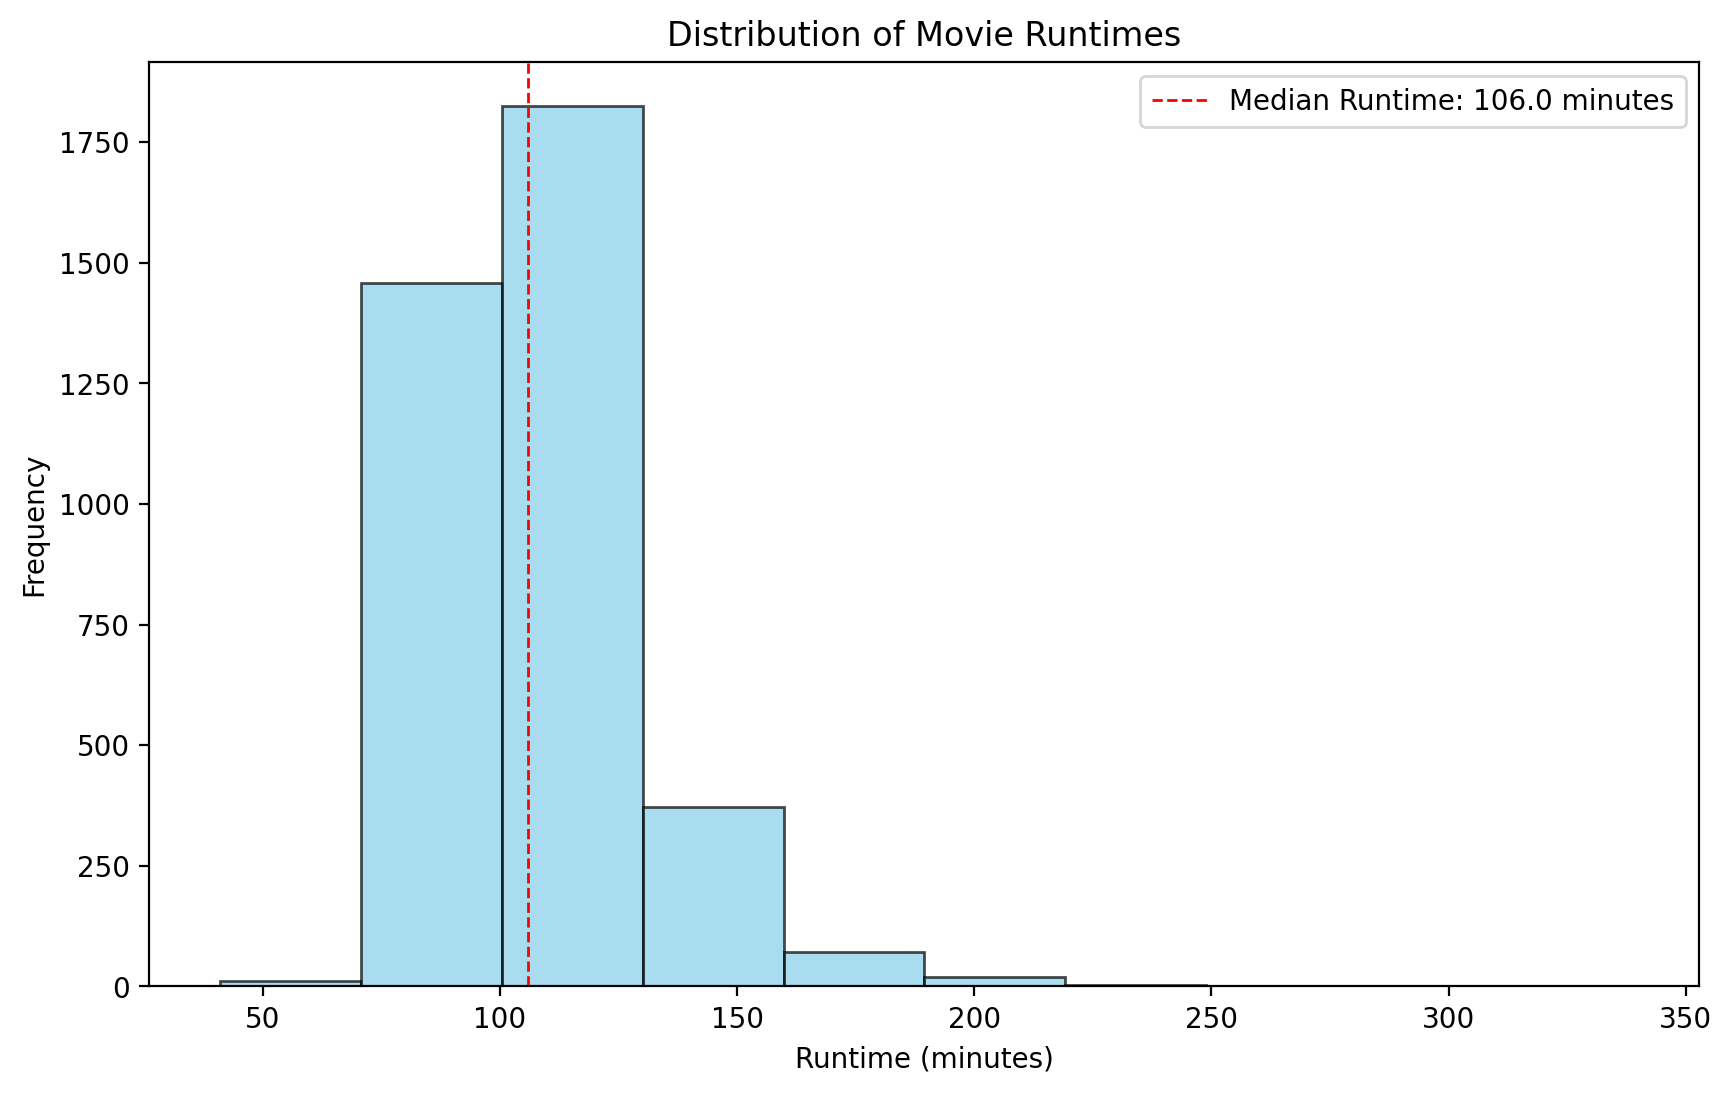

In [17]:
# Plot histogram of runtime values
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['runtime'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(median_runtime, color='red', linestyle='dashed', linewidth=1, label=f'Median Runtime: {median_runtime} minutes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.legend()
plt.show()

Now that we see that movies tend to be around 90 to 120 minutes, we can use this information to explore a little deeper into the next question of how runtime relates to its revenue. 

### 3. How does the movie runtime relate to its revenue?


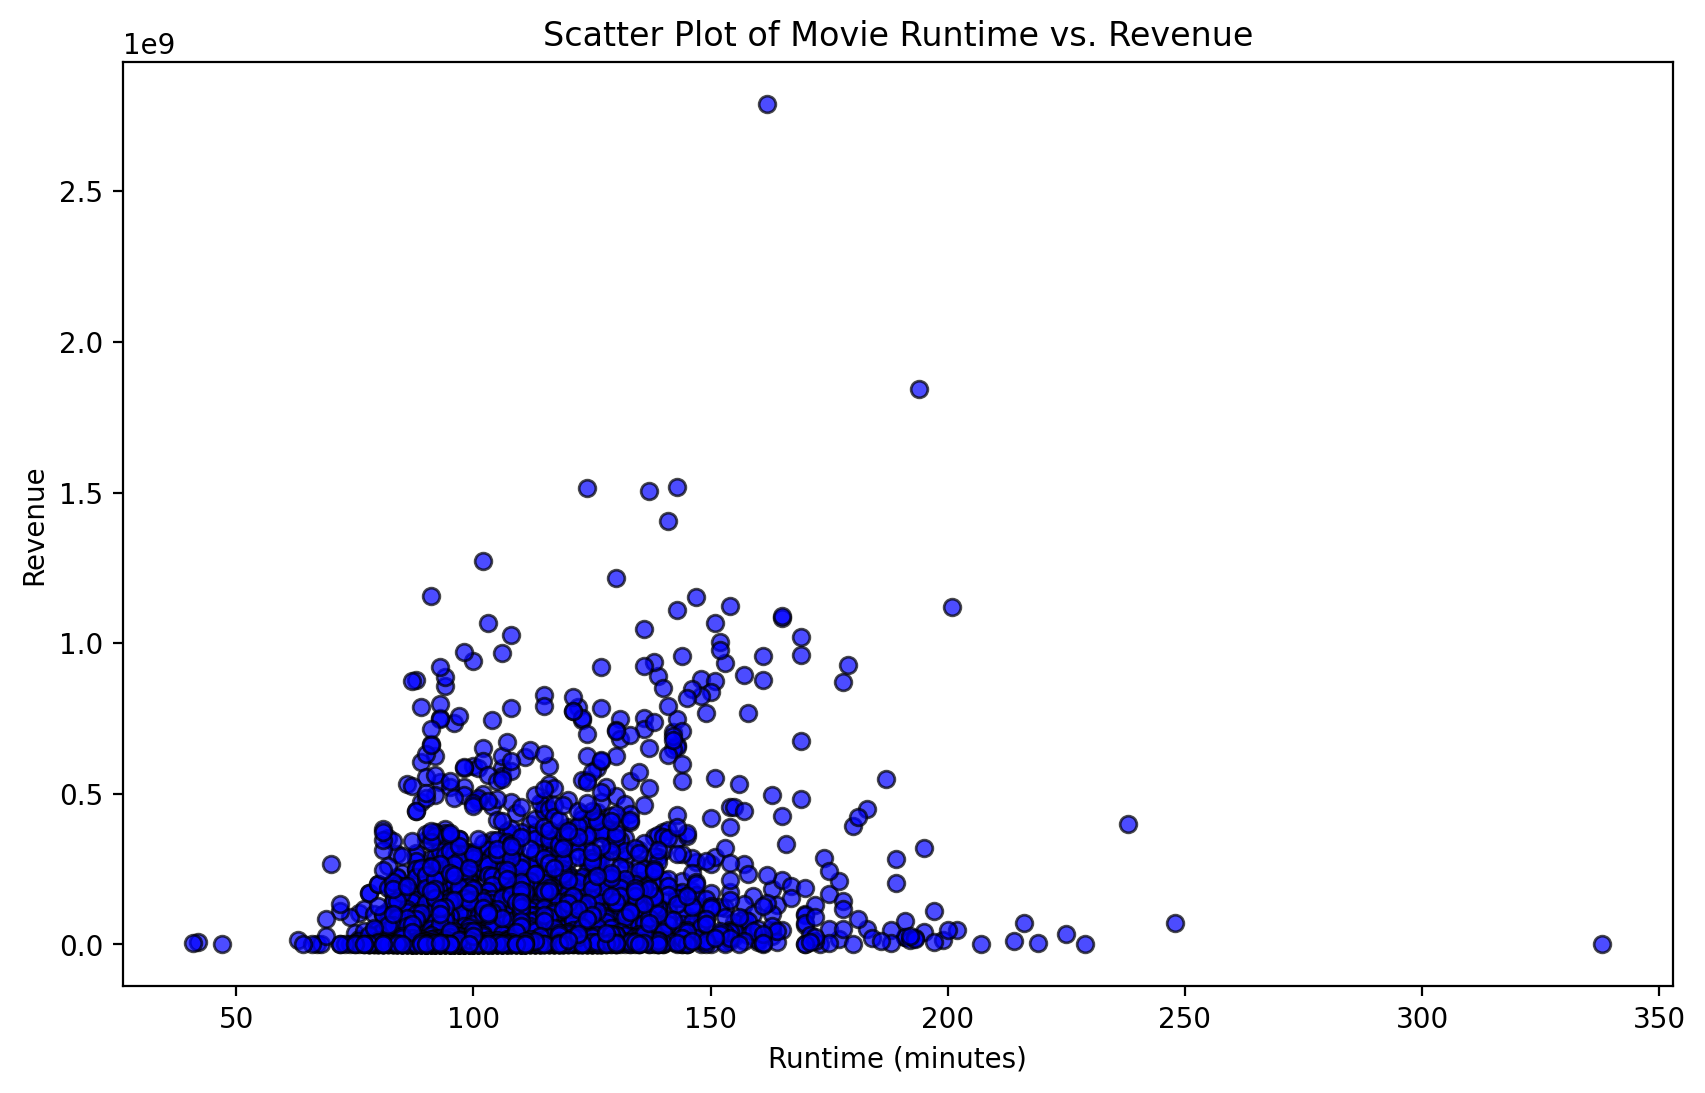

In [18]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['runtime'], df_cleaned['revenue'], color='blue', alpha=0.7, edgecolors='k')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue')

plt.title('Scatter Plot of Movie Runtime vs. Revenue')
plt.show()

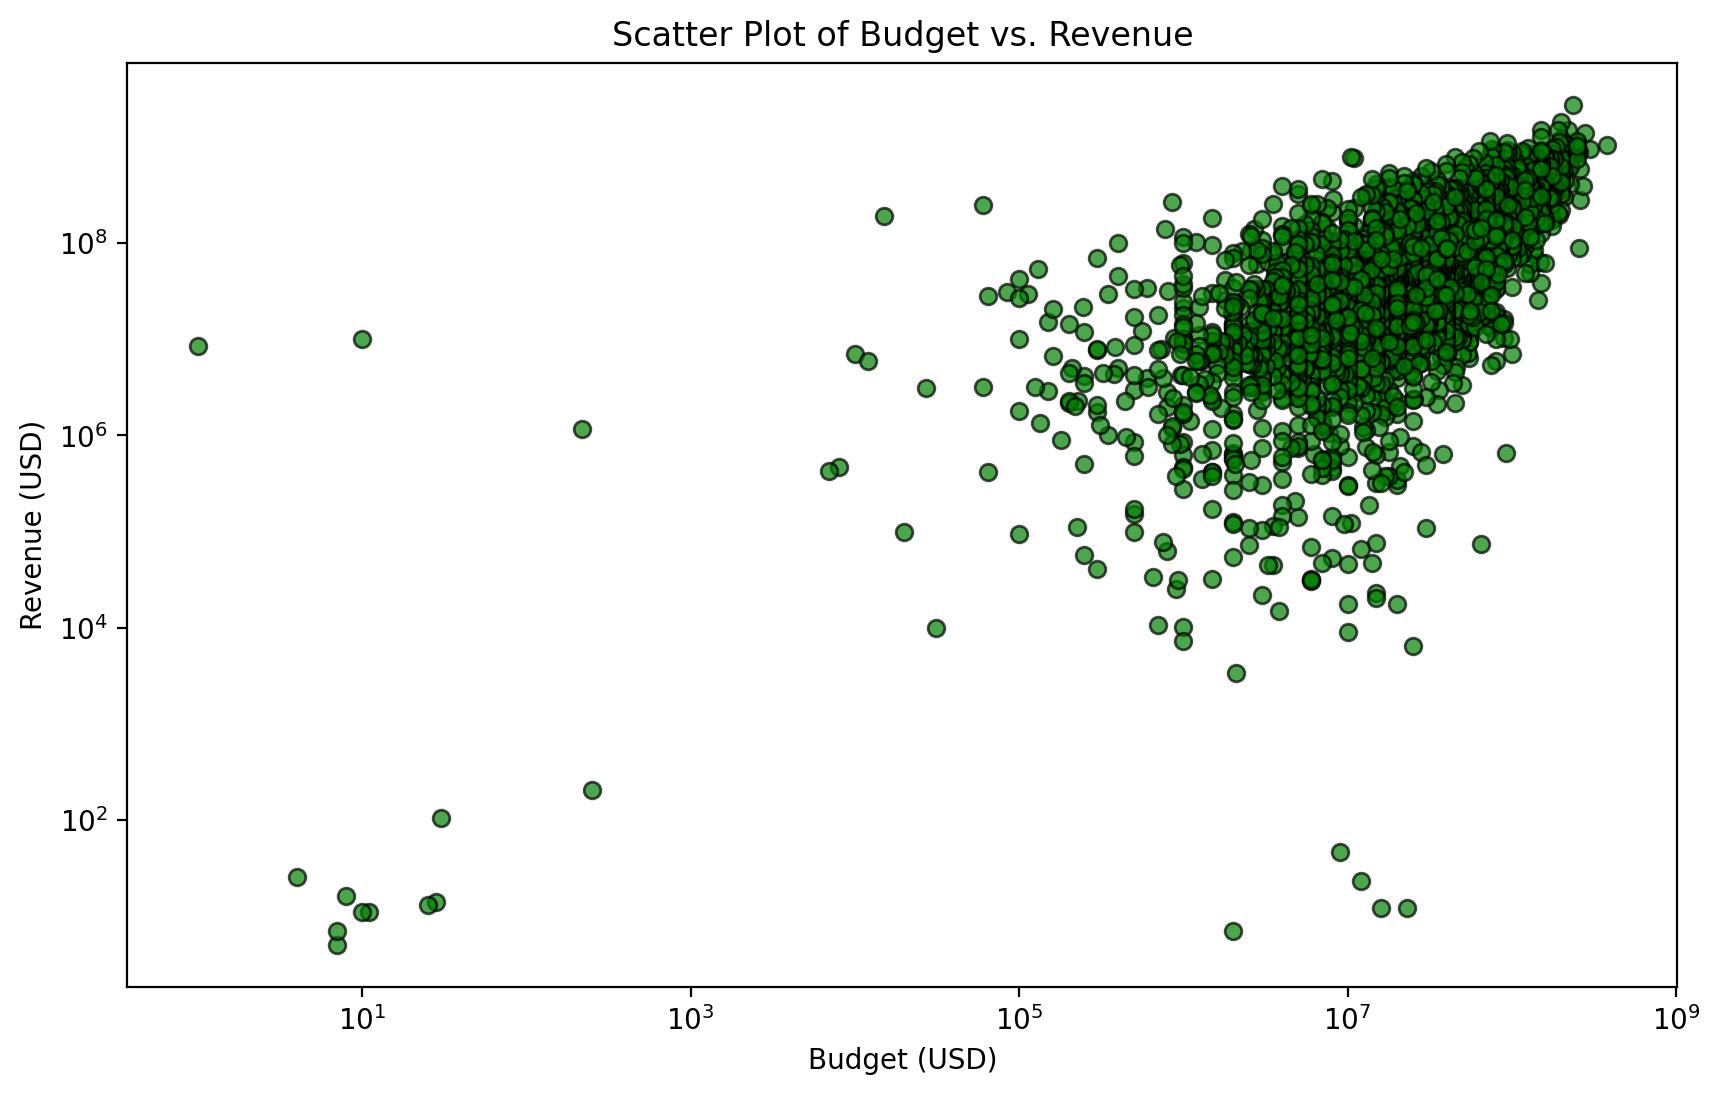

In [22]:
# Plotting revenue vs. budget
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['budget'], df_cleaned['revenue'], color='green', alpha=0.7, edgecolors='k')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.title('Scatter Plot of Budget vs. Revenue')
plt.xscale('log') 
plt.yscale('log') 
plt.show()

These two graphs show if runtime or budget affect the revenue of the movie.

<a id='conclusions'></a>
## Conclusions

Using data cleaning, plotting and analyzing techniques learned in this course, I was able to determine that Avatar was the highest earning movie and The Lone Ranger was the lowest earning movie in the dataset. While I was able to find the highest and lowest earners, I could investigate to see what factors let to those movies earning what they did. Relationships to how popularity affects profit, or if certain production companies tend to produce higher earning movies.

Looking at all the movies (after removing some outliers), the median runtime was 106 minutes. I wanted to see how runtime would relate to the profit that movie generated. While there was no conclusive correlation between profit and runtime, with more information we could come up with a more conclusive answer. The general trend is that longer movies tended to earn less, but more information is needed for a more complete analysis.


## Submitting your Project 



In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
